In [1]:
import scipy

In [2]:
from mpl_toolkits.mplot3d import Axes3D
#from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
for dirname, _, filenames in os.walk('kaggle\input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

kaggle\input\movilidad-de-personas-sample.csv


In [4]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [5]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [6]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [7]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# movilidad-de-personas-sample.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('kaggle\input\movilidad-de-personas-sample.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'movilidad-de-personas-sample.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 25 columns


In [8]:
df1.head(5)

,date,destination_activity,destination_autonomous_region_name,destination_district_mitma_id,destination_district_name,destination_lat_centroid,destination_lon_centroid,destination_province_name,destination_town_name,distance_km_interval,...,origin_district_mitma_id,origin_district_name,origin_lat_centroid,origin_lon_centroid,origin_province_name,origin_town_name,total_km_traveled,year,month,day
0,2020-02-21T00:00:00.000Z,casa,País Vasco,01001_AM,NaN,42.880124,-2.435669,Araba/Álava,"Iruraiz-Gauna, Asparrena, Elburgo/Burgelu, Ale...",5-10,...,01043_AM,NaN,42.675376,-2.448669,Araba/Álava,"Kripan, Arraia-Maeztu, Bernedo, Elvillar/Bilar...",39,2020,2,21
1,2020-02-21T00:00:00.000Z,otros,País Vasco,01001_AM,NaN,42.880124,-2.435669,Araba/Álava,"Iruraiz-Gauna, Asparrena, Elburgo/Burgelu, Ale...",10-50,...,01051,NaN,42.838613,-2.387477,Araba/Álava,Agurain/Salvatierra,66,2020,2,21
2,2020-02-21T00:00:00.000Z,otros,País Vasco,01001_AM,NaN,42.880124,-2.435669,Araba/Álava,"Iruraiz-Gauna, Asparrena, Elburgo/Burgelu, Ale...",10-50,...,01901_AM,NaN,42.862383,-2.909112,Araba/Álava,"Erriberagoitia/Ribera Alta, Kuartango, Iruña O...",198,2020,2,21
3,2020-02-21T00:00:00.000Z,otros,País Vasco,01001_AM,NaN,42.880124,-2.435669,Araba/Álava,"Iruraiz-Gauna, Asparrena, Elburgo/Burgelu, Ale...",>100,...,09056,NaN,42.541345,-3.314272,Burgos,Briviesca,1859,2020,2,21
4,2020-02-21T00:00:00.000Z,otros,País Vasco,01001_AM,NaN,42.880124,-2.435669,Araba/Álava,"Iruraiz-Gauna, Asparrena, Elburgo/Burgelu, Ale...",50-100,...,3120102,NaN,42.812310,-1.642099,Navarra,Pamplona/Iruña,474,2020,2,21


C:\Users\pedro\AppData\Local\Temp/ipykernel_5500/964395601.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
C:\Users\pedro\AppData\Local\Temp/ipykernel_5500/964395601.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
C:\Users\pedro\AppData\Local\Temp/ipykernel_5500/964395601.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
C:\Users\pedro\AppData\Local\Temp/ipykernel_5500/964395601.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 

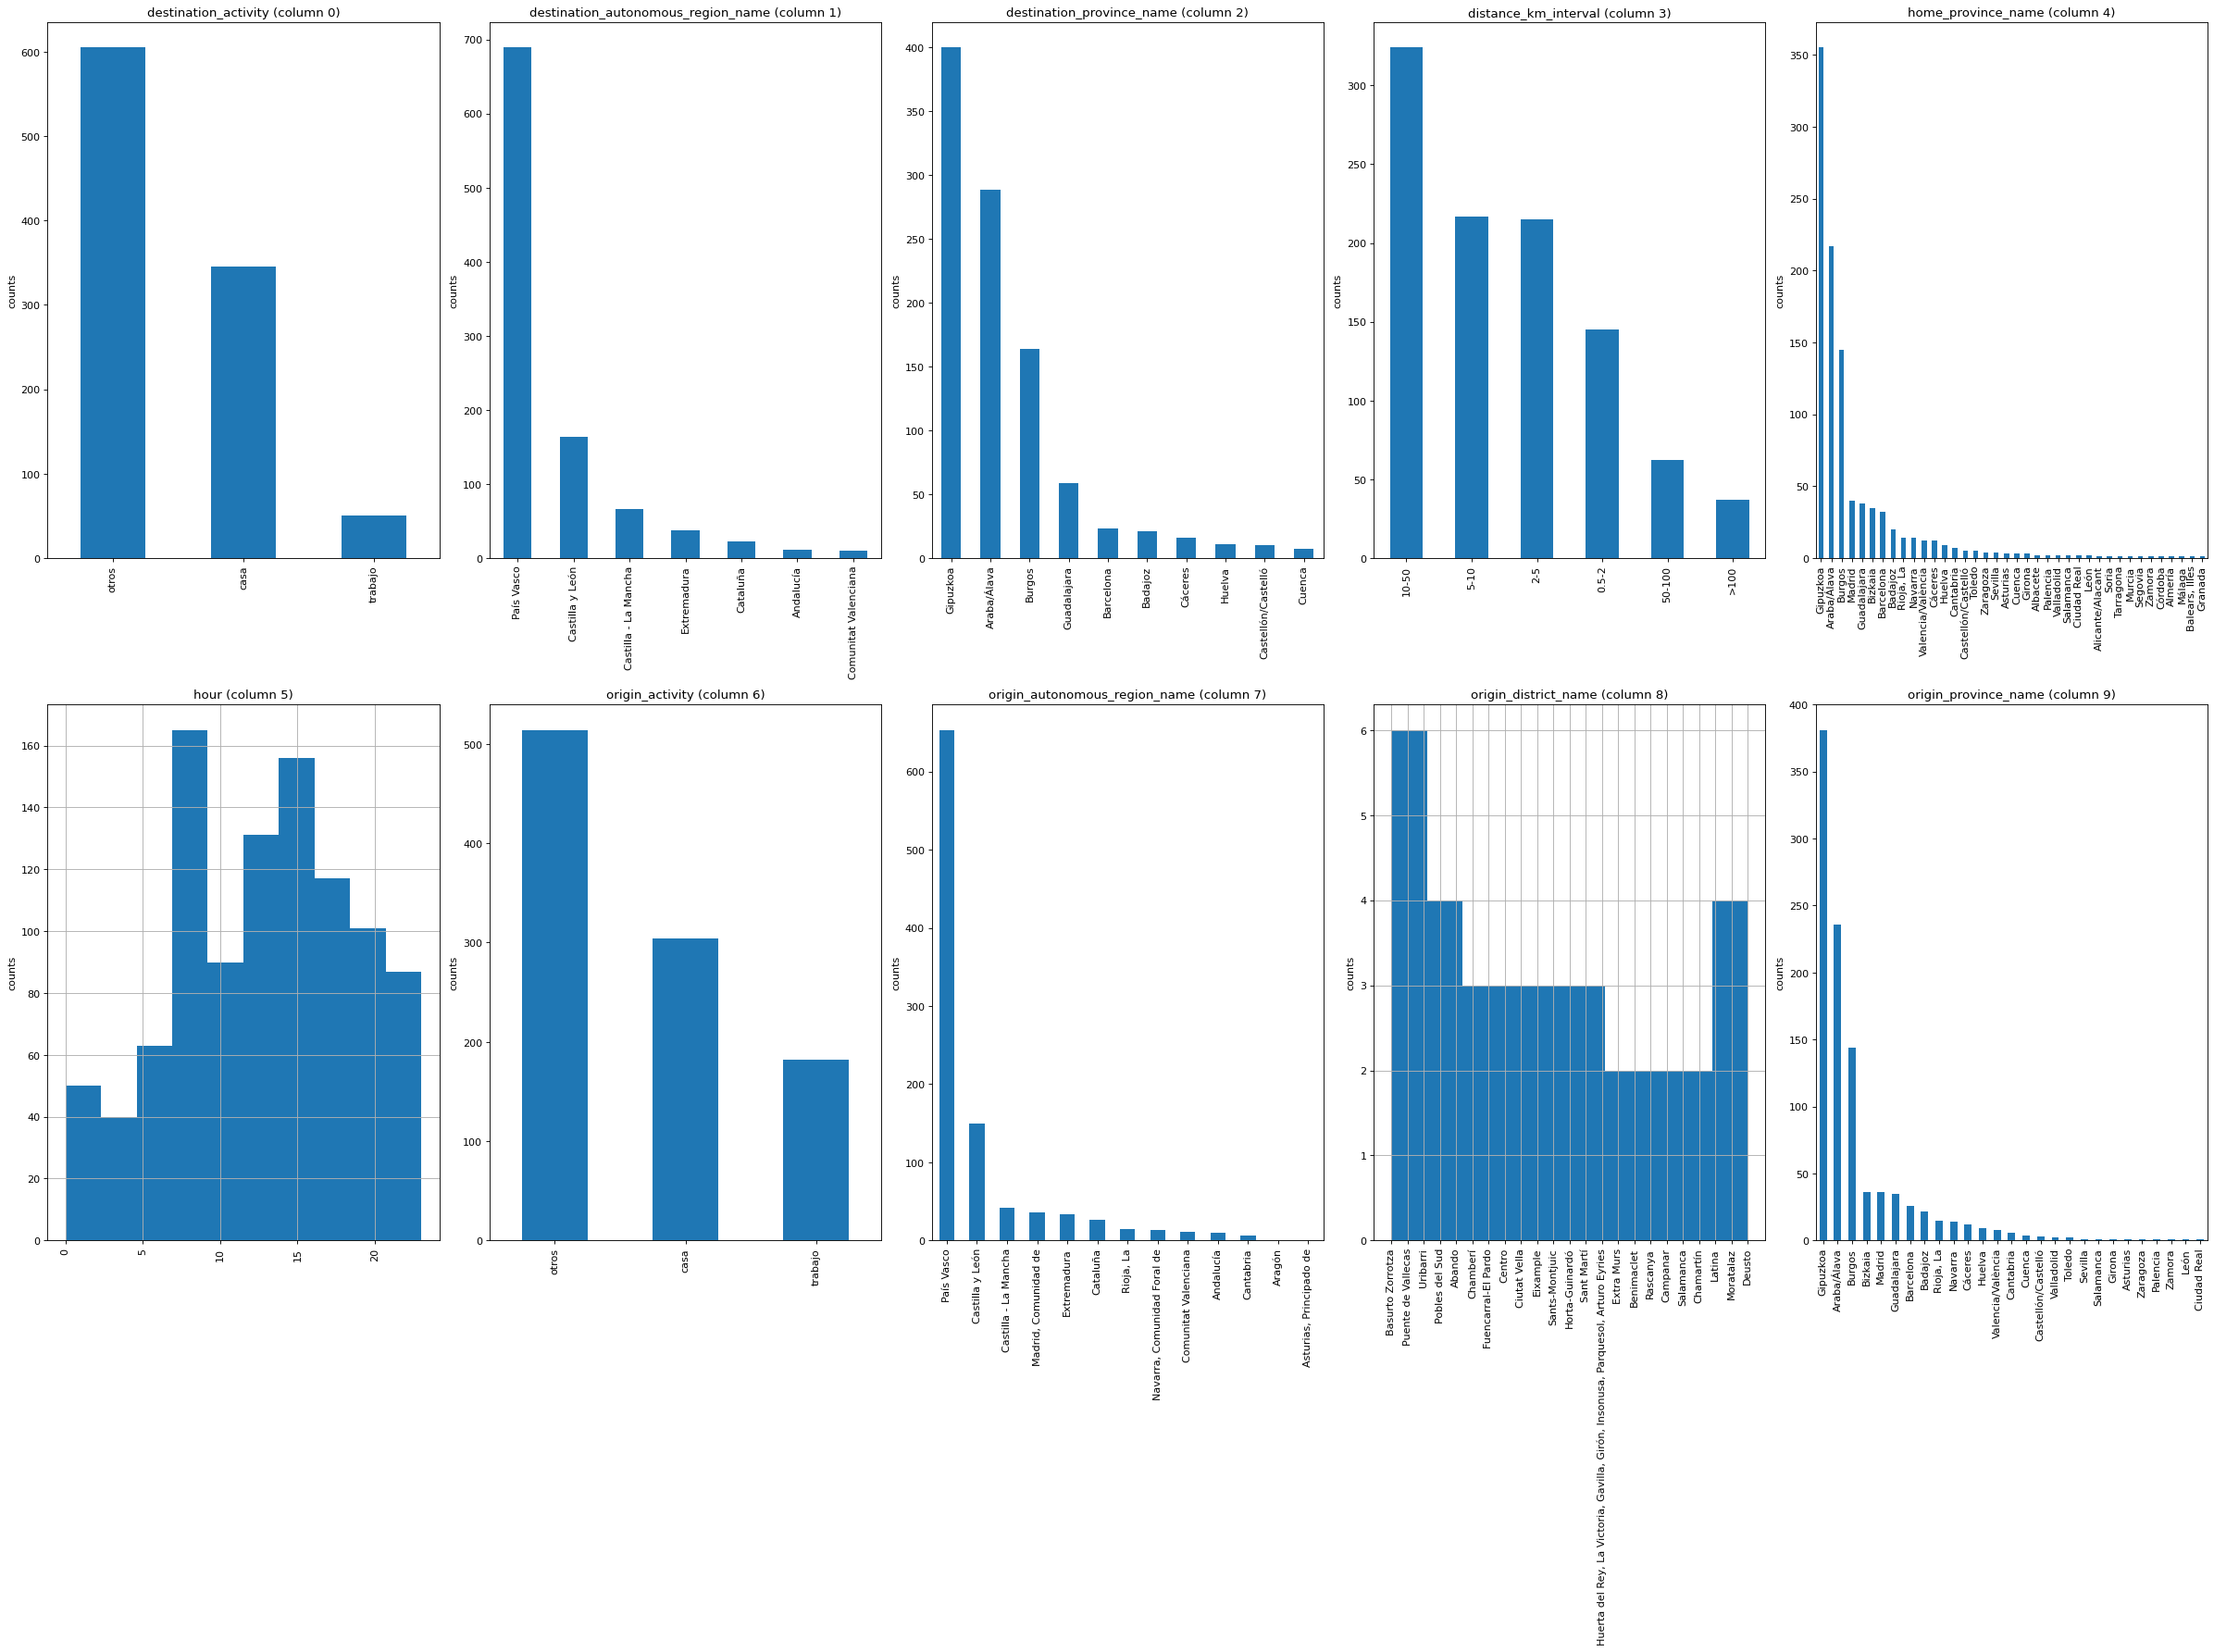

In [9]:
plotPerColumnDistribution(df1, 10, 5)

C:\Users\pedro\AppData\Local\Temp/ipykernel_5500/3510424060.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


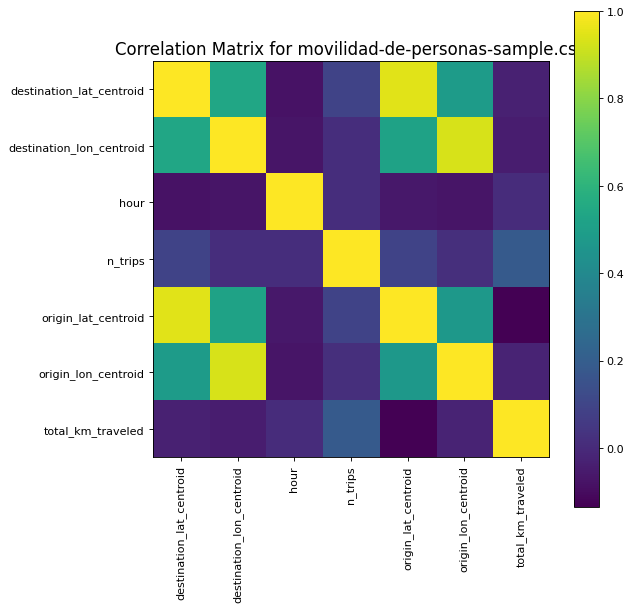

In [10]:
plotCorrelationMatrix(df1, 8)

C:\Users\pedro\AppData\Local\Temp/ipykernel_5500/102845399.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


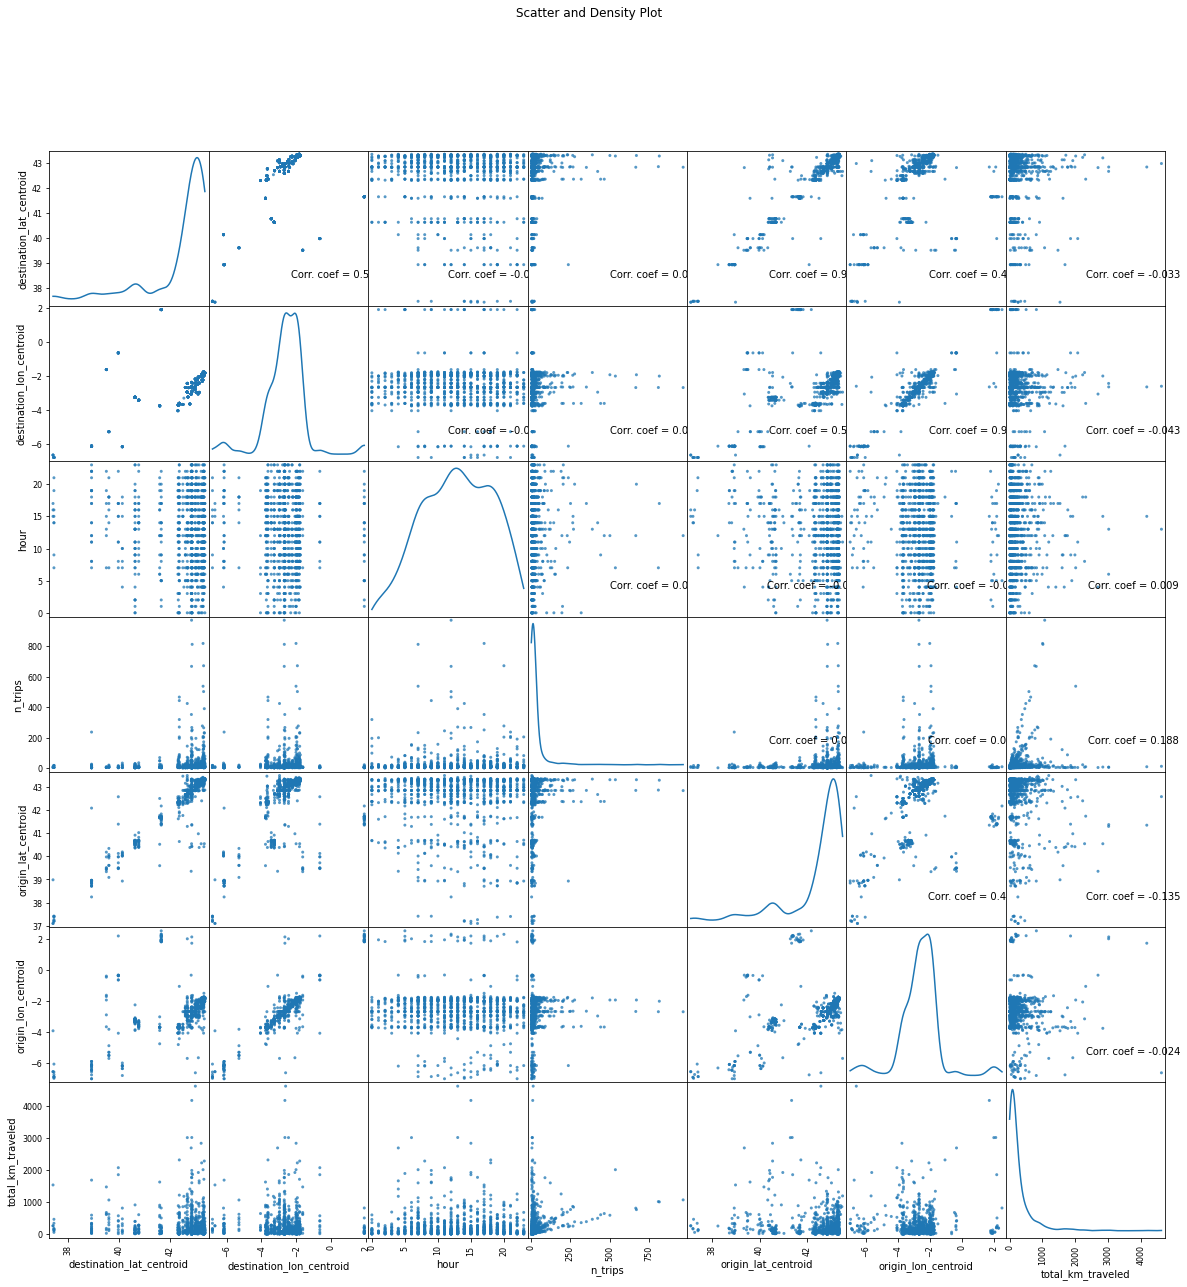

In [11]:
plotScatterMatrix(df1, 20, 10)